Challenge:

Now that you've learned about random forests and decision trees let's do an exercise in accuracy. You know that random forests are basically a collection of decision trees. But how do the accuracies of the two models compare?

So here's what you should do. Pick a dataset. It could be one you've worked with before or it could be a new one. Then build the best decision tree you can.

Now try to match that with the simplest random forest you can. For our purposes measure simplicity with runtime. Compare that to the runtime of the decision tree. This is imperfect but just go with it.

Hopefully out of this you'll see the power of random forests, but also their potential costs. Remember, in the real world you won't necessarily be dealing with thousands of rows. It could be millions, billions, or even more.

Submit a link to your models below.

In [1]:
# Import packages and libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
from sklearn import tree
import pydotplus
import graphviz
import time
from sklearn import ensemble
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import datasets, svm
%matplotlib inline

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
# Load dataset:
df = pd.read_csv(r'C:\Users\mebra.DESKTOP-L12LJA6\Thinkful Works\PythonThinkful\titanic.csv')

In [3]:
# Look at the dataset:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Look at the number of nonnull and type of columns:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
# Look at the shape of dataset:
df.shape

(891, 12)

In [6]:
# Look at the number of unique in each columns:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [7]:
# Findout percentage of null in each columns:
round((df.isnull().sum()*100)/(df.isnull().count()),2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

Filling columns with low percentage of blank and drop columns with high percentage of blank.

In [8]:
# Filling Age column:
df.Age = df.Age.fillna(df.Age.mean())

In [9]:
# Drop Cabin column:
df = df.drop(['Cabin'], axis=1)   

In [10]:
# Filling Embarked column:
for i in range(0, len(df.Embarked)):
    if pd.isnull(df.Embarked[i]):
        df.Embarked[i] = df.Embarked[i-1]       
        
df["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

Object type makes huge problems and we need convert to numeric where it makes sense. 

In [11]:
# Findout number of columns are object type, also findout number of unique value in each column:
categorical = df.select_dtypes(include=['object'])
for i in categorical:
    column = categorical[i]
    print(i)
    print(column.nunique())

Name
891
Sex
2
Ticket
681
Embarked
3


Lets drop the ones with over 30 unique values, then converting others to numeric where it makes sense.

In [12]:
# Drop Name and Ticket columns:
df = df.drop(['Name', 'Ticket'], axis=1)   

Model requires the independent variables to be numeric, so let's use get_dummies to generate a dummy variable for every categorical column.

In [13]:
# Convert to dummies:
df = pd.get_dummies(df)

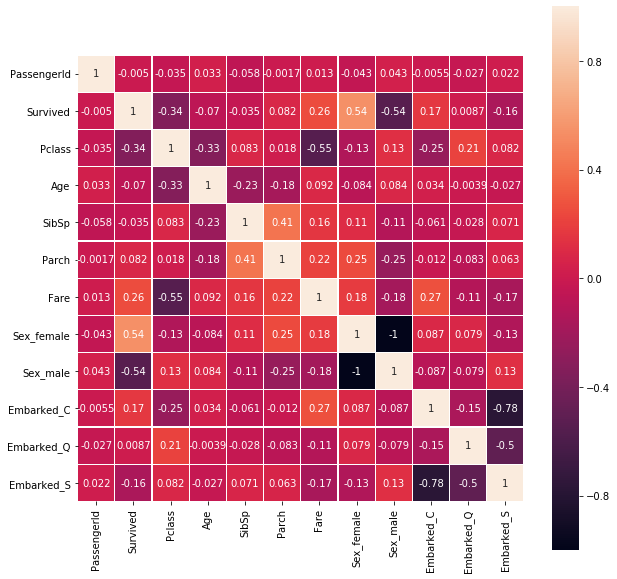

In [14]:
# Explore the correlation between all the variables in our dataset:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),linewidths=0.1, square=True, linecolor='white', annot=True)

As you can see here, survived variable has a highest correlations with Sex in absolute terms.

- Then build the best decision tree you can:
- For our purposes measure simplicity with runtime. Compare that to the runtime of the decision tree. This is imperfect but just go with it.
- Hopefully out of this you'll see the power of random forests, but also their potential costs. Remember, in the real world you won't necessarily be dealing with thousands of rows. It could be millions, billions, or even more. what doeas potencial cost means?

In [15]:
# Describe features and target variables:
X = df.drop('Survived', 1)
Y = df['Survived']


In [16]:
# Applying decision tree model with default parameters:       
start_time = time.time()

decision_tree = tree.DecisionTreeClassifier(criterion='entropy', splitter='best')

decision_tree.fit(X, Y)

score = cross_val_score(decision_tree, X, Y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
print("--- %s seconds ---" % (time.time() - start_time))

Accuracy: 0.76 (+/- 0.14)
--- 0.07883119583129883 seconds ---


As you can see, the average accuracy in decision tree model with all default parameters is around 76%. 

In [17]:
# Split dataset when evaluate model:
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

#print("The number of observations in training set is {}".format(X_train.shape[0]))
#print("The number of observations in test set is {}".format(X_test.shape[0]))

In [18]:
# Params for classifier:
params = {"max_depth": [3, 5, 7],
             # "max_features": [1, 3, 5, 7, 10, 12, 14],
              "min_samples_split": [2, 3, 5, 7],
              #"min_samples_leaf": [1, 3, 5, 7, 10, 12, 14],
              "criterion": ["gini", "entropy"]}

In [19]:
# Finding best decision tree:

clf = GridSearchCV(estimator=decision_tree, 
                    param_grid=params,
                    cv=10,
                    refit=True,
                    error_score=0,
                    n_jobs=-1)

X = df.drop('Survived', 1)
Y = df['Survived']

clf.fit(X, Y)

score = cross_val_score(clf, X, Y, cv=10)  
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))


Accuracy: 0.82 (+/- 0.06)


As you can see the accuracy of finding best model is 82%.

In [20]:
# View the accuracy score
print('Best score for decision tree model:', clf.best_score_) 

Best score for decision tree model: 0.819304152637486


In [21]:
# View the best parameters for the model found using grid search
print('Best max_depth:',clf.best_estimator_.max_depth) 
print('Best max_features:',clf.best_estimator_.max_features)
print('Best min_samples_split:',clf.best_estimator_.min_samples_split)
print('Best min_samples_leaf:',clf.best_estimator_.min_samples_leaf)
print('Best criterion:',clf.best_estimator_.criterion)



Best max_depth: 7
Best max_features: None
Best min_samples_split: 7
Best min_samples_leaf: 1
Best criterion: gini


In [26]:
# Applying best  params
start_time = time.time()
dt = tree.DecisionTreeClassifier(criterion='gini', max_depth=7,
                                            max_features=None, min_samples_split= 7, min_samples_leaf= 1)

X = df.drop('Survived', 1)
Y = df['Survived']

dt.fit(X, Y)
score = cross_val_score(dt, X, Y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
print("--- %s seconds ---" % (time.time() - start_time))

Accuracy: 0.81 (+/- 0.06)
--- 0.0947422981262207 seconds ---


As you can see, after applying grid search to find best parameters for decision tree model, the average accuracy is around 81% which is increased around 6%.

- Now try to match that with the simplest random forest you can. 

In [23]:
# Now applying random forest. we can not apllying some parameters of another model to compare.
start_time = time.time()
rfc = ensemble.RandomForestClassifier()

X = df.drop('Survived', 1)
Y = df['Survived']

rfc.fit(X, Y)
score = cross_val_score(rfc, X, Y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
print("--- %s seconds ---" % (time.time() - start_time))

Accuracy: 0.81 (+/- 0.09)
--- 0.1994922161102295 seconds ---


As you can see, the average accuracy in Random forest model with all default parameters is around 81% which is increased compare default parameters in decision tree around 6%. 

As compare two models, the decision tree with best parameters has the same accuracy of random forest and short time consuming. 